In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('mall customers - mall customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.rename(columns={'Annual Income (k$)' : 'income', 'Spending Score (1-100)': 'score'}, inplace = True)

In [5]:
df.head()

,CustomerID,Gender,Age,income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df = df.drop('CustomerID', axis = 1)

In [7]:
df.head()

,Gender,Age,income,score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [8]:
df.describe()

,Age,income,score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [9]:
df.Age.std()

13.969007331558883

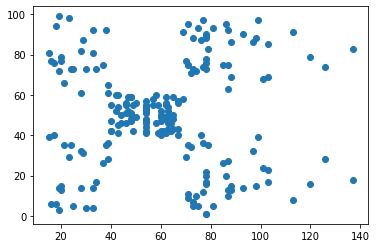

In [10]:
plt.scatter(df.income, df.score)

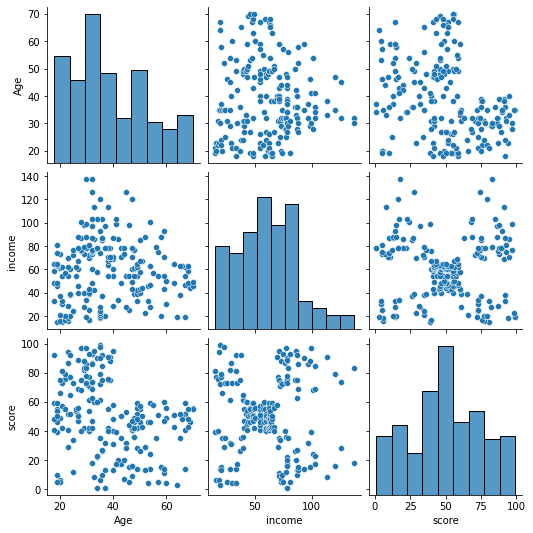

In [11]:
import seaborn as sns
sns.pairplot(df[['Age', 'income', 'score']])

# Kmeans Cluster

In [12]:
import sklearn.cluster as cluster

In [13]:
kmeans = cluster.KMeans()

In [14]:
predicted = kmeans.fit_predict(df[['income', 'score']])

In [15]:
predicted

array([4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6,
       4, 6, 4, 6, 4, 3, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 3, 6, 3, 3,
       4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 0, 5, 1, 5, 0, 5, 0, 5,
       1, 5, 0, 5, 0, 5, 0, 5, 0, 5, 1, 5, 0, 5, 1, 5, 0, 5, 0, 5, 0, 5,
       0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5,
       0, 5, 0, 5, 7, 2, 7, 2, 7, 2, 7, 2, 7, 2, 7, 2, 7, 2, 7, 2, 7, 2,
       7, 2])

In [16]:
df['cluster_1']= predicted

In [17]:
df.head()

,Gender,Age,income,score,cluster_1
0,Male,19,15,39,4
1,Male,21,15,81,6
2,Female,20,16,6,4
3,Female,23,16,77,6
4,Female,31,17,40,4


In [18]:
center = kmeans.cluster_centers_

In [19]:
center

array([[ 79.70833333,  14.29166667],
       [ 61.44230769,  48.07692308],
       [109.7       ,  82.        ],
       [ 44.26470588,  51.29411765],
       [ 25.14285714,  19.52380952],
       [ 78.55172414,  82.17241379],
       [ 24.95      ,  81.        ],
       [109.7       ,  22.        ]])

In [20]:
df0 = df[df.cluster_1 == 0]
df1 = df[df.cluster_1 == 1]
df2 = df[df.cluster_1 == 2]
df3 = df[df.cluster_1 == 3]
df4 = df[df.cluster_1 == 4]
df5 = df[df.cluster_1 == 5]
df6 = df[df.cluster_1 == 6]
df7 = df[df.cluster_1 == 7]

In [21]:
df0.shape

(24, 5)

In [22]:
df2.shape

(10, 5)

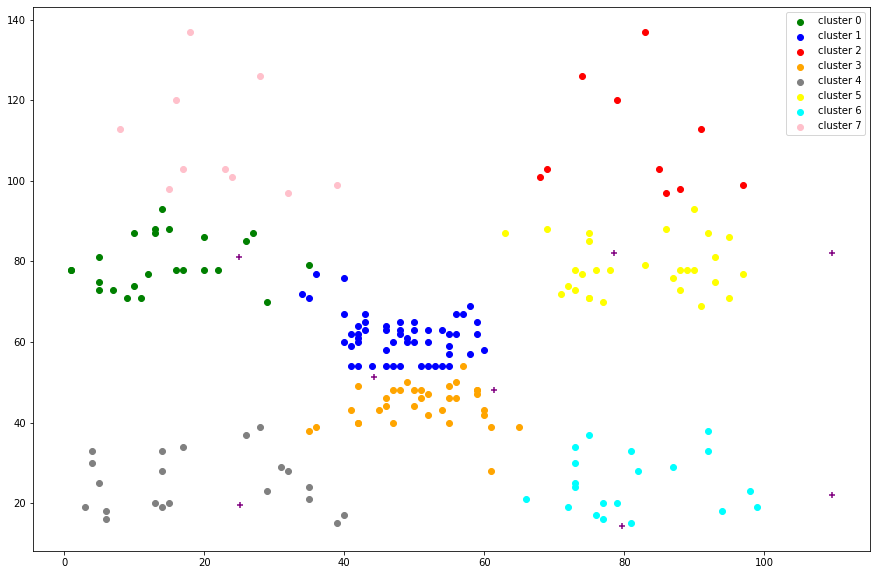

In [23]:
plt.figure(figsize=(15,10))
plt.scatter(df0['score'],df0['income'], color = 'green', label ='cluster 0')
plt.scatter(df1['score'],df1['income'], color = 'blue', label ='cluster 1')
plt.scatter(df2['score'],df2['income'], color = 'red', label ='cluster 2')
plt.scatter(df3['score'],df3['income'], color = 'orange', label ='cluster 3')
plt.scatter(df4['score'],df4['income'], color = 'gray', label ='cluster 4')
plt.scatter(df5['score'],df5['income'], color = 'yellow', label ='cluster 5')
plt.scatter(df6['score'],df6['income'], color = 'cyan', label ='cluster 6')
plt.scatter(df7['score'],df7['income'], color = 'pink', label ='cluster 7')

plt.scatter(center[:,0], center[:,1], color='purple', marker='+')

plt.legend()

# Select Optimal number of cluster

In [24]:
wcss = []
clusters = range(1,15)
for k in clusters:
    km = cluster.KMeans(n_clusters = k)
    km.fit(df[['score', 'income']])
    wcss.append(km.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [25]:
wcss

[269981.28,
 181363.59595959596,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37233.81451071001,
 30259.65720728547,
 25091.848340548342,
 21850.165282585636,
 19634.55462934998,
 18106.004263049614,
 16260.289703760289,
 14733.81741820346,
 13147.300563566869]

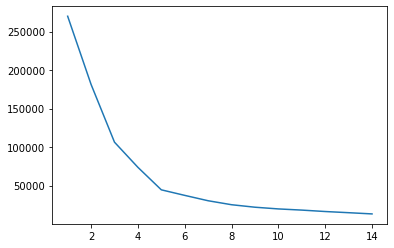

In [26]:
plt.plot(clusters, wcss)

In [27]:
!pip install kneed

Defaulting to user installation because normal site-packages is not writeable


In [28]:
from kneed import KneeLocator
kn = KneeLocator(clusters, wcss, curve= 'convex', direction = 'decreasing')

In [29]:
kn.knee

5

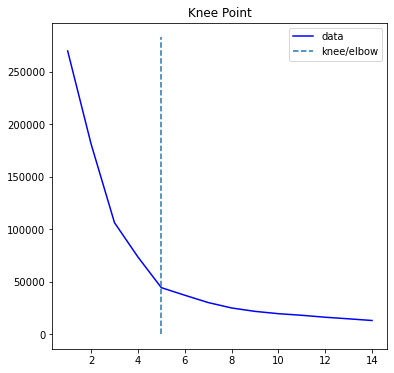

In [30]:
kn.plot_knee()

In [31]:
kmeans2 = cluster.KMeans(n_clusters = 5)
predicted2 = kmeans2.fit_predict(df[['income', 'score']])

In [32]:
df['new_cluster'] = predicted2

In [33]:
df.head()

,Gender,Age,income,score,cluster_1,new_cluster
0,Male,19,15,39,4,4
1,Male,21,15,81,6,3
2,Female,20,16,6,4,4
3,Female,23,16,77,6,3
4,Female,31,17,40,4,4


In [37]:
center2 = kmeans2.cluster_centers_

In [38]:
center2

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

In [39]:
df0 = df[df.new_cluster == 0]
df1 = df[df.new_cluster == 1]
df2 = df[df.new_cluster == 2]
df3 = df[df.new_cluster == 3]
df4 = df[df.new_cluster == 4]

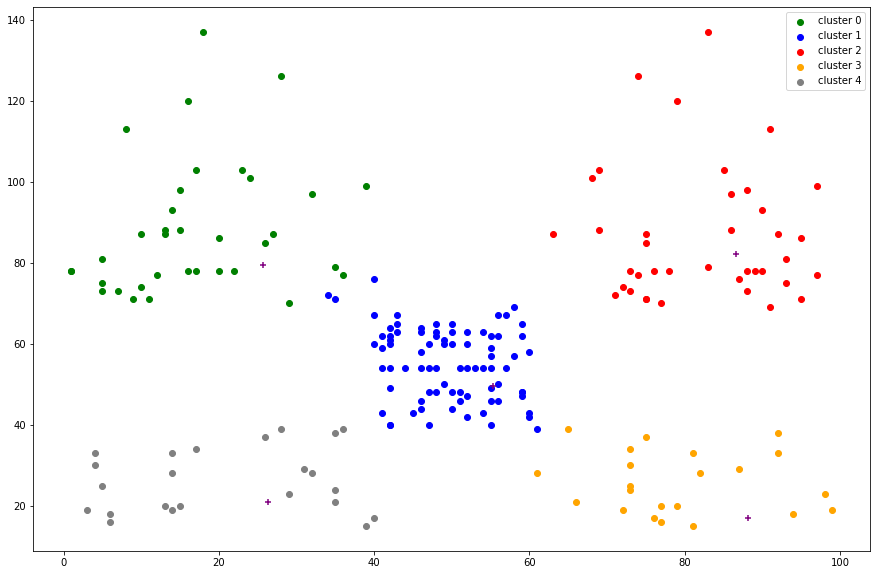

In [40]:
plt.figure(figsize=(15,10))
plt.scatter(df0['score'],df0['income'], color = 'green', label ='cluster 0')
plt.scatter(df1['score'],df1['income'], color = 'blue', label ='cluster 1')
plt.scatter(df2['score'],df2['income'], color = 'red', label ='cluster 2')
plt.scatter(df3['score'],df3['income'], color = 'orange', label ='cluster 3')
plt.scatter(df4['score'],df4['income'], color = 'gray', label ='cluster 4')

plt.scatter(center2[:,0], center2[:,1], color='purple', marker='+')

plt.legend()

In [41]:
kmeans2.predict([[15,40]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([4])